# Trading Project

- Using yahoo api to get the price from different companies

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
tickerSymbol = "AAPL"
tickerData = yf.Ticker(tickerSymbol)
apple = tickerData.history(period='1d', start='2010-1-1', end="2020-9-23")
tickerData.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-02-09 08:17:00,Canaccord Genuity,Buy,,main
2012-03-08 07:33:00,FBN Securities,Outperform,,main
2012-03-13 06:08:00,Jefferies,Buy,,main
2012-03-14 06:13:00,Morgan Stanley,Overweight,,main
2012-03-14 08:21:00,Canaccord Genuity,Buy,,main
...,...,...,...,...
2020-09-23 09:27:52,CLSA,Buy,,main
2020-09-23 09:28:49,FBN Securities,Outperform,,main
2020-09-23 09:30:06,FBR Capital,Outperform,,main


In [55]:
import datetime

start_sp = datetime.datetime(2010, 1, 1)
end_sp = datetime.datetime(2020, 9, 22)

In [4]:
from pandas_datareader import data as pdr
#import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)
SP500 = pdr.get_data_yahoo('SPY', start_sp, end_sp)
    
SP500.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,112.769997,112.800003,111.389999,111.440002,89.950172,90637900
2010-01-04,112.370003,113.389999,111.510002,113.330002,91.475693,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,91.717857,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,91.782425,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.169884,131091100


In [5]:
len(SP500)#2689

2689

### Using Mongodb

In [6]:
import pymongo
from pymongo import MongoClient

In [7]:
myclient = MongoClient("mongodb://localhost:27017/")
mydb = myclient["Stocks"]
mycol = mydb["Tickers"]

In [8]:
# Step 2: Insert Data into DB
SP500.reset_index(inplace=True) # Reset Index
data_dict = SP500.to_dict("records") # Convert to dictionary
mycol.insert_one({"Index":"SPY","data":data_dict}) # inesrt into DB

### Get data from DB

In [9]:
# Step 3: Get data from DB
data_from_db = mycol.find_one({"symbol":"FB"})
FB = pd.DataFrame(data_from_db["data"])
FB.set_index("Date",inplace=True)

In [10]:
#AMZN.to_csv('AMZN.csv')
#AAPL.to_csv('AAPL.csv')
#GOOG.to_csv('GOOG.csv')
#TSLA.to_csv('TSLA.csv')
#MSFT.to_csv('MSFT.csv')
#SPY.to_csv('SPY.csv')
#FB.to_csv('FB.csv')

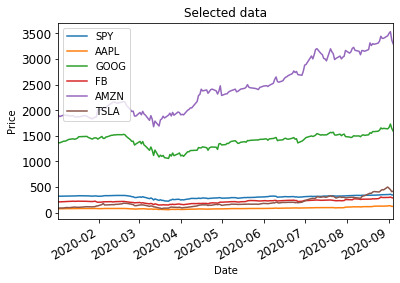

SPY      54.403965
GOOG    315.596611
TSLA     53.110601
MSFT     47.614139
FB       59.147332
AMZN    724.673347
AAPL     20.206789
dtype: float64


In [11]:
def plot_selected(df1, columns, start_index, end_index):
    plot_data(df1.loc[start_index:end_index, columns], title="Selected data")
    

def symbol_to_path(symbol, base_dir='data'):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    
    df1 = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:
        symbols.insert(0, 'SPY')
        
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date', parse_dates=True,
                             usecols=['Date', 'Adj Close'], na_values=['nan'])
        
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df1 = df1.join(df_temp)
        if symbol == 'SPY':
            df1 = df1.dropna(subset=['SPY'])
    return df1

def normalize_data(df1):
    return df1 / df1.loc[0,:]

def plot_data(df1, title = "Stock prices"):
        ax = df1.plot(title=title, fontsize=12)
        ax.set_xlabel("Date")
        ax.set_ylabel("Price")
        plt.show()
        
def test_run():
    dates = pd.date_range('2013-01-01', '2020-09-07')
    symbols = ['GOOG', 'TSLA', 'MSFT', 'FB', 'AMZN', "AAPL"]
    #Get stock data
    df1 = get_data(symbols, dates)
    
    plot_selected(df1, ["SPY", "AAPL", "GOOG", "FB", "AMZN", "TSLA"], "2020-01-02", "2020-09-04")
    
    print(df1.std())
    
   
    
if __name__ == "__main__":
    test_run()

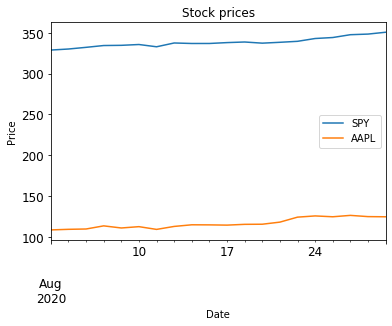

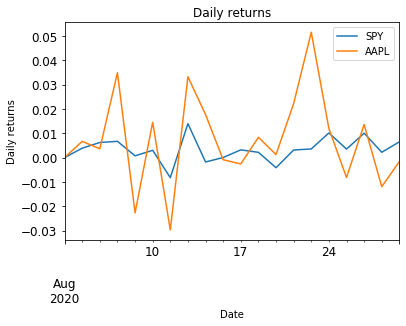

In [12]:
#def plot_selected(df1, columns, start_index, end_index):
  #  plot_data(df1.loc[start_index:end_index, columns], title="Selected data")
    

def symbol_to_path(symbol, base_dir='data'):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    
    df1 = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:
        symbols.insert(0, 'SPY')
        
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date', parse_dates=True,
                             usecols=['Date', 'Adj Close'], na_values=['nan'])
        
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df1 = df1.join(df_temp)
        if symbol == 'SPY':
            df1 = df1.dropna(subset=['SPY'])
    return df1

def plot_data(df1, title = "Stock prices", xlabel="Date", ylabel="Price"):
        ax = df1.plot(title=title, fontsize=12)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        plt.show()
        
def compute_daily_returns(df1):
    daily_returns = df1.copy()
    
    daily_returns[1:] = (df1[1:] / df1[:-1].values) - 1
    daily_returns.iloc[0, :] = 0
    return daily_returns
        
def test_run():
    dates = pd.date_range('2020-08-01', '2020-08-30')
    symbols = ['SPY', 'AAPL']
    #Get stock data
    df1 = get_data(symbols, dates)
    plot_data(df1)
    
    daily_returns = compute_daily_returns(df1)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
    
   
    
if __name__ == "__main__":
    test_run()

In [13]:
start_date = '2012-06-01' #2010, 1, 1
end_date = '2020-09-07'
dates = pd.date_range(start_date, end_date)
    #print(dates[0])
df1 = pd.DataFrame(index=dates)#empy dataframe
    #print(df1)
dfSPY = pd.read_csv('data/SPY.csv', index_col="Date", parse_dates=True, usecols=['Date', 'Adj Close'],
                    na_values=['nan'])
dfSPY = dfSPY.rename(columns={'Adj Close': 'SPY'})
    #print(dfSPY)
df1 = df1.join(dfSPY, how = 'inner')
df1 = df1.dropna()
    #print(df1)
    
symbols = ['GOOG', 'TSLA', 'MSFT', 'FB', 'AMZN', 'AAPL']
for symbol in symbols:
    df_temp = pd.read_csv("data/{}.csv".format(symbol), index_col='Date', parse_dates=True,
                          usecols=['Date', 'Adj Close'], na_values=['nan'])
    df_temp = df_temp.rename(columns={'Adj Close': symbol})
    df1 = df1.join(df_temp)
    

In [14]:
df1

,SPY,GOOG,TSLA,MSFT,FB,AMZN,AAPL
2012-06-01,108.594398,284.423920,5.630000,23.588511,27.719999,208.220001,17.313335
2012-06-04,108.543587,288.214691,5.576000,23.671429,26.900000,214.570007,17.415182
2012-06-05,109.365501,284.139984,5.582000,23.638258,25.870001,213.210007,17.370125
2012-06-06,111.822762,289.200989,5.844000,24.334715,26.809999,217.639999,17.636463
2012-06-07,111.890556,288.035370,5.786000,24.235220,26.309999,218.800003,17.644480
...,...,...,...,...,...,...,...
2020-08-31,349.309998,1634.180054,498.320007,225.529999,293.200012,3450.959961,129.039993
2020-09-01,352.600006,1660.709961,475.049988,227.270004,295.440002,3499.120117,134.179993
2020-09-02,357.700012,1728.280029,447.369995,231.649994,302.500000,3531.449951,131.399994
2020-09-03,345.390015,1641.839966,407.000000,217.300003,291.119995,3368.000000,120.879997


In [15]:
df = df1.copy()

### Model

In [16]:
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [17]:
df.shape

(2080, 7)

In [18]:
data = df.filter(['GOOG'])
dataset = data.values #convert to nparray
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1664

In [19]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
#scaled_data
#training dataset
train_data = scaled_data[0: training_data_len, :]
#split the data
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60 : i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00409902, 0.0067137 , 0.00390317, 0.007394  , 0.00659002,
       0.00735279, 0.00324691, 0.0020787 , 0.00070093, 0.        ,
       0.001876  , 0.00405435, 0.00772385, 0.00634264, 0.00211651,
       0.0042708 , 0.00056693, 0.00193441, 0.00352178, 0.00180727,
       0.00722222, 0.00735965, 0.00988846, 0.01266809, 0.00925282,
       0.00926314, 0.00778226, 0.00417115, 0.00392721, 0.00600248,
       0.00545275, 0.00607464, 0.0074593 , 0.01168541, 0.01778754,
       0.01939897, 0.01667089, 0.01681518, 0.01866026, 0.02608175,
       0.0251678 , 0.025398  , 0.02529837, 0.02394807, 0.0282704 ,
       0.02878234, 0.02799896, 0.02857961, 0.02862085, 0.02850059,
       0.03468861, 0.03766065, 0.03727583, 0.03910716, 0.04057427,
       0.04002454, 0.03795269, 0.04058801, 0.04045744, 0.04108621])]
[0.03785304606316087]



In [20]:
#conver x_train and y_train to nparray
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1604, 60, 1)

In [22]:
# LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [23]:
#compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [24]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Train on 1604 samples
1604/1604 [==============================] - 85s 53ms/sample - loss: 9.2846e-04


In [25]:
#creat testing data set
test_data = scaled_data[training_data_len - 60:, :]
#create x_test, y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60: i, 0])


In [26]:
#convert data to nparray
x_test = np.array(x_test)
#reshape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(416, 60, 1)

In [27]:
#models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [28]:
# get the RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.1406877957857577

C:\Users\utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


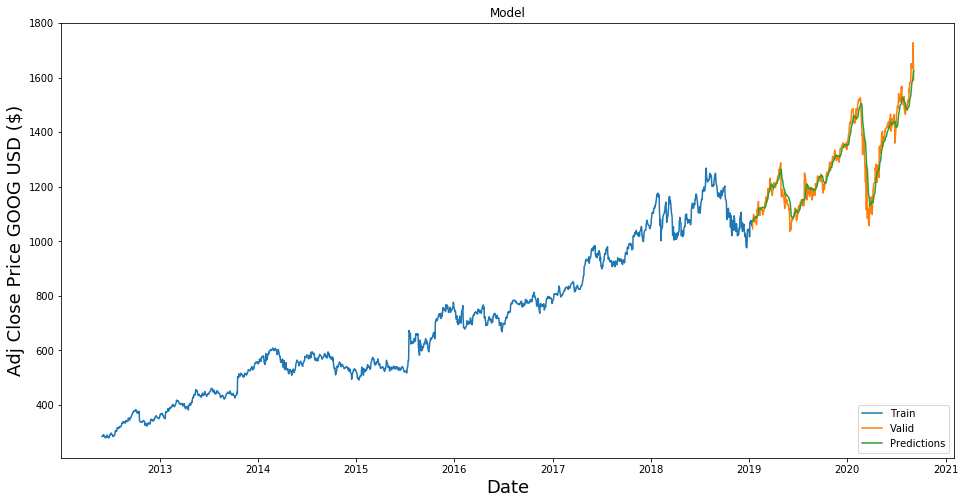

In [29]:
#plot
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price GOOG USD ($)', fontsize=18)
plt.plot(train['GOOG'])
plt.plot(valid[['GOOG', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

In [30]:
#show valid and predicted prices
valid

,SPY,GOOG,TSLA,MSFT,FB,AMZN,AAPL,Predictions
2019-01-14,250.039413,1044.689941,66.879997,99.769432,145.389999,1617.209961,36.691772,1073.022095
2019-01-15,252.905075,1077.150024,68.886002,102.663292,148.949997,1674.560059,37.442734,1072.059448
2019-01-16,253.517014,1080.969971,69.209999,103.025009,147.539993,1683.780029,37.900158,1073.388306
2019-01-17,255.440445,1089.900024,69.461998,103.748474,148.300003,1693.219971,38.125195,1076.006104
2019-01-18,258.840332,1098.260010,60.452000,105.302940,150.039993,1696.199951,38.360023,1079.970215
...,...,...,...,...,...,...,...,...
2020-08-31,349.309998,1634.180054,498.320007,225.529999,293.200012,3450.959961,129.039993,1590.041992
2020-09-01,352.600006,1660.709961,475.049988,227.270004,295.440002,3499.120117,134.179993,1597.567749
2020-09-02,357.700012,1728.280029,447.369995,231.649994,302.500000,3531.449951,131.399994,1605.747437
2020-09-03,345.390015,1641.839966,407.000000,217.300003,291.119995,3368.000000,120.879997,1620.776123


In [69]:
apple_pred = pdr.get_data_yahoo('AAPL', start="2010-01-01", end="2020-09-20")#start_sp, end_sp)
n_df = apple_pred.filter(['Close'])
last_60_days = n_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[97.16459]]


In [70]:
apple_pred = pdr.get_data_yahoo('AAPL', start="2020-09-21", end="2020-09-22")#end_sp)
print(apple_pred['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2020-09-21    110.080002
Name: Close, dtype: float64


### Scraping News for Sentiment Analysis

In [31]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [32]:
news_tables = {}
tickers = ['AMZN', 'TSLA', 'GOOG', 'AAPL', 'MSFT', 'FB']

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [33]:
# Read one single day of headlines for 'AMZN' 
amzn = news_tables['AMZN']
# Get all the table rows tagged in HTML with <tr> into 'amzn_tr'
amzn_tr = amzn.findAll('tr')

for i, table_row in enumerate(amzn_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text' 
    print(a_text)
    print(td_text)
    # Exit after printing 4 rows of data
    if i == 3:
        break

US STOCKS-Nike set to lift S&P 500, Dow ahead of business activity data
Sep-23-20 08:31AM  
Its Not Too Late to Profit on FedEx Stocks Big Swing. Heres How With Options.
08:30AM  
Amazon Says Its Not Making the $500 Prime Bike With Echelon
08:17AM  
Amazon removes the $500 Prime Bike, says it has nothing to do with the Peloton knock-off
08:14AM  


In [34]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news

[['AMZN',
  'Sep-23-20',
  '08:31AM',
  'US STOCKS-Nike set to lift S&P 500, Dow ahead of business activity data'],
 ['AMZN',
  'Sep-23-20',
  '08:30AM',
  'Its Not Too Late to Profit on FedEx Stocks Big Swing. Heres How With Options.'],
 ['AMZN',
  'Sep-23-20',
  '08:17AM',
  'Amazon Says Its Not Making the $500 Prime Bike With Echelon'],
 ['AMZN',
  'Sep-23-20',
  '08:14AM',
  'Amazon removes the $500 Prime Bike, says it has nothing to do with the Peloton knock-off'],
 ['AMZN',
  'Sep-23-20',
  '08:13AM',
  'Dow Jones Futures Jump 200 Points As Nike Soars 13% On Earnings; Tesla Dives On Battery Day'],
 ['AMZN',
  'Sep-23-20',
  '08:07AM',
  'GLOBAL MARKETS-Tech lifts stocks as poor data rekindles stimulus hopes'],
 ['AMZN',
  'Sep-23-20',
  '07:58AM',
  "Reports say Amazon Prime Day will take place on Oct. 13 though the e-commerce giant hasn't confirmed"],
 ['AMZN', 'Sep-23-20', '07:49AM', 'Better Buy: Beyond Meat vs. Walmart'],
 ['AMZN',
  'Sep-23-20',
  '07:28AM',
  "Peloton Reboun

In [35]:
mycol.insert_one({"name":"News","data":parsed_news}) # inesrt into DB

In [36]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head(20)

,ticker,date,time,headline,neg,neu,pos,compound
0,AMZN,2020-09-23,08:31AM,"US STOCKS-Nike set to lift S&P 500, Dow ahead ...",0.000,1.000,0.000,0.0000
1,AMZN,2020-09-23,08:30AM,Its Not Too Late to Profit on FedEx Stocks Big...,0.000,0.828,0.172,0.4404
2,AMZN,2020-09-23,08:17AM,Amazon Says Its Not Making the $500 Prime Bike...,0.000,0.855,0.145,0.1779
3,AMZN,2020-09-23,08:14AM,"Amazon removes the $500 Prime Bike, says it ha...",0.000,0.898,0.102,0.1779
4,AMZN,2020-09-23,08:13AM,Dow Jones Futures Jump 200 Points As Nike Soar...,0.000,1.000,0.000,0.0000
5,AMZN,2020-09-23,08:07AM,GLOBAL MARKETS-Tech lifts stocks as poor data ...,0.223,0.576,0.201,-0.0772
6,AMZN,2020-09-23,07:58AM,Reports say Amazon Prime Day will take place o...,0.000,0.904,0.096,0.1779
7,AMZN,2020-09-23,07:49AM,Better Buy: Beyond Meat vs. Walmart,0.000,0.633,0.367,0.4404
8,AMZN,2020-09-23,07:28AM,Peloton Rebounds as Amazon Debunks $499 'Prime...,0.000,0.825,0.175,0.1779
9,AMZN,2020-09-23,07:07AM,A Deep Dive Into JFrog -- the Tech Company Kee...,0.000,1.000,0.000,0.0000


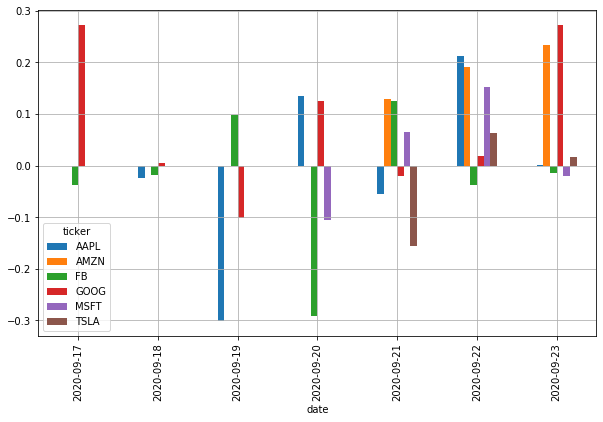

In [37]:
plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()

In [38]:
import streamlit as st
from PIL import Image

In [39]:
#adding a title and an image
st.write("""
# Stock Market Application
Visually show data on stock! Date from....
""")

image = Image.open("stock.jpg")
st.image(image, use_column_width=True)

#sidebar header
st.sidebar.header('User Imput')

#funtion to get the users input
def get_input():
   
    start_date = st.sidebar.text_input("Start Date", "2020-08-01")
    end_date = st.sidebar.text_input("Etart Date", "2020-09-04")
    stock_symbol = st.sidebar.text_input("Stock Symbol", "GOOG")
    return start_date, end_date, stock_symbol

#function to get the company name
def get_comp_name(symbol):
    if symbol == "AMZN":
        return 'Amazon'
    elif symbol == "AAPL":
        return 'Appel'
    elif symbol == "GOOG":
        return 'Alphabet'
    elif symbol == "TSLA":
        return "Tesla"
    elif symbol == "MSFT":
        return "Microsoft"
    elif symbol == "FB":
        return "FaceBook"
    else: 
        "None"
        
#function to get the companies time frame
def get_data(symbol, start, end):
    
    #load data
    if symbol.upper() == "AMZN":
        df = pd.read_csv('data/AMZN.csv')
    elif symbol.upper() == "GOOG":
        df = pd.read_csv('data/GOOG.csv')
    elif symbol.upper() == "TSLA":
        df = pd.read_csv('data/TSLA.csv')
    elif symbol.upper() == "MSFT":
        df = pd.read_csv('data/MSFT.csv')
    elif symbol.upper() == "FB":
        df = pd.read_csv('data/FB.csv') 
    elif symbol.upper() == "AAPL":
        df = pd.read_csv('data/AAPL.csv')
        

    #get the date range
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)

    #set start and end index
    start_row = 0
    end_row = 0

    #start the date from the top of the dataset
    for i in range(0, len(df)):
        if start <= pd.to_datetime(df['Date'][i]):
            start_row = i
            break
            
    #start from the bottom of the dataset
    for j in range(0, len(df)):
        if end >= pd.to_datetime(df['Date'][len(df)-1-j]):
            end_row = len(df) - 1 - j
            break
            
    #set index to the date
    df = df.set_index(pd.DatetimeIndex(df['Date'].values))
    
    return df.iloc[start_row: end_row +1, :]

#get users input
start, end, symbol = get_input()
#get date
df = get_data(symbol, start, end)
#get the company name
company_name = get_comp_name(symbol.upper())

#dispaly the Adj Close price
st.header(company_name+"Adj Close Price\n")
st.line_chart(df['Adj Close'])

#dispaly the Volume
st.header(company_name+"Volume\n")
st.line_chart(df['Volume'])

#get statistics 
st.header('Data Statistics')
st.write(df.describe())

algo = st.sidebar.text_input('predictions')

finwiz_url = 'https://finviz.com/quote.ashx?t='

news_tables = {}
tickers = ['AMZN', 'TSLA', 'GOOG', 'AAPL', 'MSFT', 'FB']#, 'EUR/USD']

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [40]:
#news_table

parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news